# 200 - First percepton with pytorch

First perception on MNIST database.

**Note:** install [tqdm](https://pypi.python.org/pypi/tqdm) if not installed: ``!pip install tqdm``

In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
from pylab import plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
print("torch", torch.__version__)
from torchvision import datasets, transforms
from tqdm import tqdm

torch 0.2.0_4


In [2]:
BATCH_SIZE = 64
TEST_BATCH_SIZE = 64
DATA_DIR = '/home/xd_ensae/data/'
USE_CUDA = True
N_EPOCHS = 100

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(DATA_DIR, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(DATA_DIR, train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=TEST_BATCH_SIZE, shuffle=True)

In [4]:
data, target = next(i for i in train_loader)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.tanh(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [6]:
model = Net()
if USE_CUDA: model = model.cuda()

In [7]:
optimizer = optim.Adam(model.parameters())

In [8]:
def train(epoch, verbose=True):
    model.train()
    losses = []
    loader = tqdm(train_loader, total=len(train_loader))
    for batch_idx, (data, target) in enumerate(loader):
        if USE_CUDA:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(float(loss.data[0]))
        if verbose and batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    return np.mean(losses)

In [9]:
def test(verbose=True):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if USE_CUDA: data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    if verbose:
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    return [float(test_loss), correct]

In [10]:
perfs = []
for epoch in range(1, N_EPOCHS + 1):
    t0 = time.time()
    train_loss = train(epoch, verbose=False)
    test_loss, correct = test(verbose=False)
    perfs.append([epoch, train_loss, test_loss, correct, len(test_loader.dataset), time.time() - t0])
    print("epoch {}: train loss {:.4f}, test loss {:.4f}, accuracy {}/{} in {:.2f}s".format(*perfs[-1]))

  2%|▏         | 15/938 [00:00<00:06, 144.52it/s]

epoch 1: train loss 0.4945, test loss 0.2533, accuracy 9245/10000 in 13.55s


  2%|▏         | 15/938 [00:00<00:06, 141.64it/s]

epoch 2: train loss 0.3382, test loss 0.2157, accuracy 9357/10000 in 7.50s


  2%|▏         | 16/938 [00:00<00:06, 150.40it/s]

epoch 3: train loss 0.3137, test loss 0.2005, accuracy 9386/10000 in 7.82s


  1%|▏         | 13/938 [00:00<00:07, 123.93it/s]

epoch 4: train loss 0.2998, test loss 0.1927, accuracy 9427/10000 in 7.67s


  2%|▏         | 15/938 [00:00<00:06, 144.06it/s]

epoch 5: train loss 0.2896, test loss 0.1879, accuracy 9429/10000 in 8.00s


  2%|▏         | 16/938 [00:00<00:06, 150.61it/s]

epoch 6: train loss 0.2800, test loss 0.1839, accuracy 9459/10000 in 7.72s


  1%|▏         | 13/938 [00:00<00:07, 122.23it/s]

epoch 7: train loss 0.2720, test loss 0.1812, accuracy 9460/10000 in 7.63s


  2%|▏         | 15/938 [00:00<00:06, 148.61it/s]

epoch 8: train loss 0.2677, test loss 0.1764, accuracy 9454/10000 in 7.83s


  1%|▏         | 14/938 [00:00<00:06, 138.63it/s]

epoch 9: train loss 0.2619, test loss 0.1717, accuracy 9506/10000 in 7.47s


  2%|▏         | 15/938 [00:00<00:06, 148.08it/s]

epoch 10: train loss 0.2596, test loss 0.1633, accuracy 9522/10000 in 7.64s


  1%|▏         | 13/938 [00:00<00:07, 128.22it/s]

epoch 11: train loss 0.2569, test loss 0.1645, accuracy 9516/10000 in 7.73s


  2%|▏         | 15/938 [00:00<00:06, 148.66it/s]

epoch 12: train loss 0.2529, test loss 0.1651, accuracy 9513/10000 in 7.81s


  1%|▏         | 13/938 [00:00<00:07, 122.19it/s]

epoch 13: train loss 0.2478, test loss 0.1614, accuracy 9505/10000 in 7.37s


  2%|▏         | 16/938 [00:00<00:06, 150.41it/s]

epoch 14: train loss 0.2452, test loss 0.1548, accuracy 9535/10000 in 7.69s


  1%|▏         | 13/938 [00:00<00:07, 123.85it/s]

epoch 15: train loss 0.2463, test loss 0.1553, accuracy 9528/10000 in 7.76s


  2%|▏         | 15/938 [00:00<00:06, 147.43it/s]

epoch 16: train loss 0.2411, test loss 0.1600, accuracy 9513/10000 in 7.74s


  2%|▏         | 16/938 [00:00<00:06, 152.30it/s]

epoch 17: train loss 0.2395, test loss 0.1558, accuracy 9524/10000 in 7.45s


  1%|▏         | 14/938 [00:00<00:06, 137.53it/s]

epoch 18: train loss 0.2385, test loss 0.1563, accuracy 9521/10000 in 7.65s


  2%|▏         | 15/938 [00:00<00:06, 148.00it/s]

epoch 19: train loss 0.2385, test loss 0.1568, accuracy 9520/10000 in 7.60s


  1%|▏         | 14/938 [00:00<00:06, 134.37it/s]

epoch 20: train loss 0.2307, test loss 0.1535, accuracy 9530/10000 in 7.75s


  1%|▏         | 14/938 [00:00<00:06, 133.26it/s]

epoch 21: train loss 0.2350, test loss 0.1525, accuracy 9540/10000 in 7.82s


  2%|▏         | 16/938 [00:00<00:05, 154.29it/s]

epoch 22: train loss 0.2323, test loss 0.1559, accuracy 9531/10000 in 7.85s


  2%|▏         | 15/938 [00:00<00:06, 147.43it/s]

epoch 23: train loss 0.2284, test loss 0.1557, accuracy 9514/10000 in 7.92s


  2%|▏         | 15/938 [00:00<00:06, 141.12it/s]

epoch 24: train loss 0.2293, test loss 0.1560, accuracy 9505/10000 in 7.97s


  2%|▏         | 16/938 [00:00<00:06, 151.68it/s]

epoch 25: train loss 0.2268, test loss 0.1505, accuracy 9551/10000 in 7.90s


  1%|▏         | 14/938 [00:00<00:06, 135.96it/s]

epoch 26: train loss 0.2251, test loss 0.1502, accuracy 9547/10000 in 7.53s


  1%|▏         | 13/938 [00:00<00:07, 127.48it/s]

epoch 27: train loss 0.2278, test loss 0.1517, accuracy 9540/10000 in 8.31s


  2%|▏         | 15/938 [00:00<00:06, 132.38it/s]

epoch 28: train loss 0.2251, test loss 0.1521, accuracy 9548/10000 in 7.93s


  1%|▏         | 12/938 [00:00<00:08, 112.14it/s]

epoch 29: train loss 0.2217, test loss 0.1511, accuracy 9549/10000 in 7.81s


  1%|▏         | 13/938 [00:00<00:07, 124.97it/s]

epoch 30: train loss 0.2199, test loss 0.1442, accuracy 9569/10000 in 7.95s


  1%|▏         | 13/938 [00:00<00:07, 129.82it/s]

epoch 31: train loss 0.2187, test loss 0.1514, accuracy 9538/10000 in 7.60s


  1%|▏         | 14/938 [00:00<00:06, 135.11it/s]

epoch 32: train loss 0.2214, test loss 0.1463, accuracy 9556/10000 in 7.93s


  2%|▏         | 15/938 [00:00<00:06, 146.29it/s]

epoch 33: train loss 0.2189, test loss 0.1460, accuracy 9548/10000 in 7.93s


  1%|▏         | 12/938 [00:00<00:07, 118.99it/s]

epoch 34: train loss 0.2179, test loss 0.1463, accuracy 9548/10000 in 7.78s


  2%|▏         | 16/938 [00:00<00:06, 151.54it/s]

epoch 35: train loss 0.2171, test loss 0.1468, accuracy 9558/10000 in 7.74s


  1%|▏         | 14/938 [00:00<00:06, 136.80it/s]

epoch 36: train loss 0.2202, test loss 0.1499, accuracy 9554/10000 in 7.71s


  2%|▏         | 15/938 [00:00<00:06, 146.11it/s]

epoch 37: train loss 0.2177, test loss 0.1468, accuracy 9548/10000 in 7.88s


  1%|▏         | 13/938 [00:00<00:07, 127.63it/s]

epoch 38: train loss 0.2171, test loss 0.1484, accuracy 9542/10000 in 8.06s


  1%|▏         | 14/938 [00:00<00:06, 138.77it/s]

epoch 39: train loss 0.2139, test loss 0.1471, accuracy 9558/10000 in 7.88s


  2%|▏         | 15/938 [00:00<00:06, 141.51it/s]

epoch 40: train loss 0.2125, test loss 0.1419, accuracy 9582/10000 in 7.66s


  1%|▏         | 13/938 [00:00<00:07, 128.24it/s]

epoch 41: train loss 0.2153, test loss 0.1485, accuracy 9556/10000 in 7.77s


  2%|▏         | 15/938 [00:00<00:06, 146.25it/s]

epoch 42: train loss 0.2123, test loss 0.1488, accuracy 9544/10000 in 7.73s


  2%|▏         | 15/938 [00:00<00:06, 142.67it/s]

epoch 43: train loss 0.2091, test loss 0.1500, accuracy 9553/10000 in 7.65s


  1%|▏         | 14/938 [00:00<00:06, 134.07it/s]

epoch 44: train loss 0.2124, test loss 0.1453, accuracy 9560/10000 in 7.75s


  1%|▏         | 14/938 [00:00<00:06, 133.09it/s]

epoch 45: train loss 0.2088, test loss 0.1436, accuracy 9560/10000 in 7.78s


  2%|▏         | 16/938 [00:00<00:06, 150.32it/s]

epoch 46: train loss 0.2107, test loss 0.1417, accuracy 9574/10000 in 7.67s


  2%|▏         | 16/938 [00:00<00:05, 155.72it/s]

epoch 47: train loss 0.2081, test loss 0.1411, accuracy 9559/10000 in 8.01s


  2%|▏         | 16/938 [00:00<00:06, 151.18it/s]

epoch 48: train loss 0.2076, test loss 0.1483, accuracy 9538/10000 in 7.88s


  2%|▏         | 16/938 [00:00<00:06, 146.36it/s]

epoch 49: train loss 0.2028, test loss 0.1437, accuracy 9561/10000 in 7.76s


  1%|▏         | 13/938 [00:00<00:07, 124.97it/s]

epoch 50: train loss 0.2096, test loss 0.1436, accuracy 9575/10000 in 7.80s


  1%|▏         | 14/938 [00:00<00:07, 131.43it/s]

epoch 51: train loss 0.2058, test loss 0.1418, accuracy 9575/10000 in 8.18s


  2%|▏         | 15/938 [00:00<00:06, 149.22it/s]

epoch 52: train loss 0.2064, test loss 0.1455, accuracy 9559/10000 in 7.73s


  1%|▏         | 14/938 [00:00<00:06, 136.65it/s]

epoch 53: train loss 0.2060, test loss 0.1486, accuracy 9564/10000 in 7.75s


  1%|▏         | 14/938 [00:00<00:06, 136.16it/s]

epoch 54: train loss 0.2061, test loss 0.1456, accuracy 9564/10000 in 7.83s


  2%|▏         | 16/938 [00:00<00:06, 150.93it/s]

epoch 55: train loss 0.2057, test loss 0.1441, accuracy 9550/10000 in 7.85s


  2%|▏         | 16/938 [00:00<00:06, 152.82it/s]

epoch 56: train loss 0.2007, test loss 0.1454, accuracy 9568/10000 in 8.42s


  2%|▏         | 15/938 [00:00<00:06, 145.46it/s]

epoch 57: train loss 0.2046, test loss 0.1468, accuracy 9565/10000 in 7.91s


  2%|▏         | 15/938 [00:00<00:06, 149.61it/s]

epoch 58: train loss 0.2022, test loss 0.1475, accuracy 9558/10000 in 7.70s


  1%|▏         | 13/938 [00:00<00:07, 122.64it/s]

epoch 59: train loss 0.2019, test loss 0.1455, accuracy 9568/10000 in 7.92s


  2%|▏         | 15/938 [00:00<00:06, 144.20it/s]

epoch 60: train loss 0.1996, test loss 0.1458, accuracy 9558/10000 in 8.12s


  1%|▏         | 12/938 [00:00<00:08, 115.30it/s]

epoch 61: train loss 0.2035, test loss 0.1452, accuracy 9569/10000 in 7.97s


  1%|▏         | 13/938 [00:00<00:07, 123.79it/s]

epoch 62: train loss 0.2028, test loss 0.1441, accuracy 9575/10000 in 8.06s


  1%|▏         | 12/938 [00:00<00:07, 116.79it/s]

epoch 63: train loss 0.1968, test loss 0.1436, accuracy 9570/10000 in 7.87s


  2%|▏         | 15/938 [00:00<00:06, 142.38it/s]

epoch 64: train loss 0.1962, test loss 0.1461, accuracy 9551/10000 in 7.81s


  2%|▏         | 15/938 [00:00<00:06, 147.73it/s]

epoch 65: train loss 0.2037, test loss 0.1430, accuracy 9556/10000 in 8.59s


  1%|▏         | 13/938 [00:00<00:07, 123.15it/s]

epoch 66: train loss 0.2005, test loss 0.1437, accuracy 9556/10000 in 7.96s


  1%|▏         | 14/938 [00:00<00:07, 131.23it/s]

epoch 67: train loss 0.1980, test loss 0.1440, accuracy 9563/10000 in 8.23s


  2%|▏         | 15/938 [00:00<00:06, 145.95it/s]

epoch 68: train loss 0.1967, test loss 0.1451, accuracy 9565/10000 in 8.05s


  2%|▏         | 15/938 [00:00<00:06, 146.35it/s]

epoch 69: train loss 0.1972, test loss 0.1423, accuracy 9562/10000 in 8.11s


  2%|▏         | 15/938 [00:00<00:06, 146.52it/s]

epoch 70: train loss 0.1961, test loss 0.1448, accuracy 9576/10000 in 7.94s


  2%|▏         | 15/938 [00:00<00:06, 143.13it/s]

epoch 71: train loss 0.1965, test loss 0.1485, accuracy 9545/10000 in 7.73s


  1%|▏         | 13/938 [00:00<00:07, 116.79it/s]

epoch 72: train loss 0.1977, test loss 0.1456, accuracy 9559/10000 in 8.34s


  1%|▏         | 12/938 [00:00<00:08, 113.25it/s]

epoch 73: train loss 0.1979, test loss 0.1477, accuracy 9574/10000 in 8.13s


  1%|▏         | 13/938 [00:00<00:07, 120.10it/s]

epoch 74: train loss 0.1972, test loss 0.1469, accuracy 9553/10000 in 8.23s


  1%|▏         | 12/938 [00:00<00:07, 118.04it/s]

epoch 75: train loss 0.1947, test loss 0.1473, accuracy 9561/10000 in 8.08s


  1%|▏         | 13/938 [00:00<00:07, 126.30it/s]

epoch 76: train loss 0.1928, test loss 0.1440, accuracy 9575/10000 in 7.73s


  2%|▏         | 16/938 [00:00<00:06, 150.76it/s]

epoch 77: train loss 0.1926, test loss 0.1494, accuracy 9560/10000 in 8.24s


  2%|▏         | 16/938 [00:00<00:05, 153.73it/s]

epoch 78: train loss 0.1940, test loss 0.1508, accuracy 9542/10000 in 7.87s


  1%|▏         | 14/938 [00:00<00:06, 139.66it/s]

epoch 79: train loss 0.1966, test loss 0.1422, accuracy 9569/10000 in 7.86s


  2%|▏         | 15/938 [00:00<00:06, 142.33it/s]

epoch 80: train loss 0.1921, test loss 0.1423, accuracy 9577/10000 in 7.93s


  1%|▏         | 14/938 [00:00<00:06, 132.42it/s]

epoch 81: train loss 0.1894, test loss 0.1409, accuracy 9580/10000 in 7.86s


  2%|▏         | 15/938 [00:00<00:06, 140.80it/s]

epoch 82: train loss 0.1920, test loss 0.1426, accuracy 9561/10000 in 8.36s


  1%|          | 11/938 [00:00<00:08, 107.12it/s]

epoch 83: train loss 0.1929, test loss 0.1453, accuracy 9570/10000 in 7.87s


  2%|▏         | 16/938 [00:00<00:06, 150.83it/s]

epoch 84: train loss 0.1953, test loss 0.1446, accuracy 9574/10000 in 7.92s


  2%|▏         | 15/938 [00:00<00:06, 146.67it/s]

epoch 85: train loss 0.1906, test loss 0.1450, accuracy 9558/10000 in 7.93s


  2%|▏         | 16/938 [00:00<00:06, 152.96it/s]

epoch 86: train loss 0.1915, test loss 0.1473, accuracy 9555/10000 in 7.84s


  1%|▏         | 13/938 [00:00<00:07, 125.15it/s]

epoch 87: train loss 0.1913, test loss 0.1441, accuracy 9572/10000 in 8.19s


  1%|▏         | 12/938 [00:00<00:07, 117.76it/s]

epoch 88: train loss 0.1931, test loss 0.1450, accuracy 9562/10000 in 7.84s


  1%|▏         | 13/938 [00:00<00:07, 119.79it/s]

epoch 89: train loss 0.1908, test loss 0.1465, accuracy 9550/10000 in 7.71s


  2%|▏         | 16/938 [00:00<00:06, 149.96it/s]

epoch 90: train loss 0.1920, test loss 0.1463, accuracy 9564/10000 in 8.07s


  1%|▏         | 13/938 [00:00<00:07, 120.85it/s]

epoch 91: train loss 0.1871, test loss 0.1406, accuracy 9582/10000 in 7.81s


  2%|▏         | 16/938 [00:00<00:05, 154.12it/s]

epoch 92: train loss 0.1946, test loss 0.1431, accuracy 9587/10000 in 7.79s


  2%|▏         | 15/938 [00:00<00:06, 149.10it/s]

epoch 93: train loss 0.1909, test loss 0.1472, accuracy 9563/10000 in 7.69s


  2%|▏         | 15/938 [00:00<00:06, 147.31it/s]

epoch 94: train loss 0.1926, test loss 0.1407, accuracy 9574/10000 in 7.60s


  2%|▏         | 15/938 [00:00<00:06, 149.45it/s]

epoch 95: train loss 0.1905, test loss 0.1415, accuracy 9569/10000 in 8.07s


  1%|▏         | 13/938 [00:00<00:07, 128.08it/s]

epoch 96: train loss 0.1910, test loss 0.1437, accuracy 9569/10000 in 7.93s


  2%|▏         | 15/938 [00:00<00:06, 147.29it/s]

epoch 97: train loss 0.1923, test loss 0.1389, accuracy 9576/10000 in 7.98s


  1%|▏         | 13/938 [00:00<00:07, 129.88it/s]

epoch 98: train loss 0.1873, test loss 0.1435, accuracy 9568/10000 in 7.75s


  2%|▏         | 16/938 [00:00<00:06, 153.02it/s]

epoch 99: train loss 0.1893, test loss 0.1454, accuracy 9566/10000 in 7.77s


100%|██████████| 938/938 [00:06<00:00, 140.92it/s]


epoch 100: train loss 0.1871, test loss 0.1421, accuracy 9577/10000 in 7.67s


In [11]:
df_perfs = pd.DataFrame(perfs, columns=["epoch", "train_loss", "test_loss", "accuracy", "n_test", "time"])
df_perfs

,epoch,train_loss,test_loss,accuracy,n_test,time
0,1,0.494527,0.253278,9245,10000,13.551054
1,2,0.338234,0.215682,9357,10000,7.502503
2,3,0.313669,0.200523,9386,10000,7.816235
3,4,0.299771,0.192725,9427,10000,7.671069
4,5,0.289576,0.187909,9429,10000,7.998625
5,6,0.280034,0.183928,9459,10000,7.723974
6,7,0.271956,0.181222,9460,10000,7.626516
7,8,0.267716,0.176355,9454,10000,7.825798
8,9,0.261895,0.171745,9506,10000,7.468393
9,10,0.259575,0.163313,9522,10000,7.642768


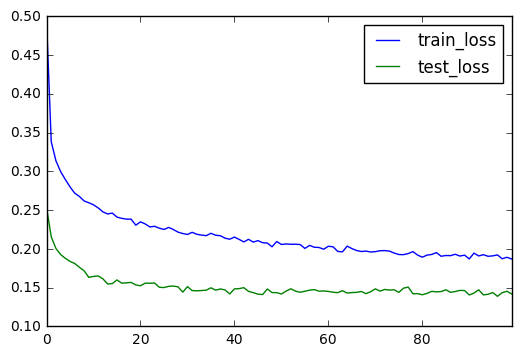

In [12]:
df_perfs[["train_loss", "test_loss"]].plot();

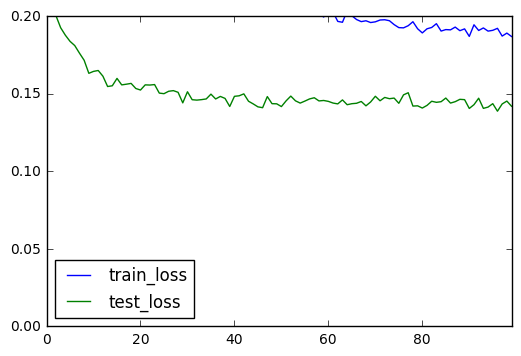

In [13]:
df_perfs[["train_loss", "test_loss"]].plot(ylim=(0, 0.2));